### Importing Libraries

In [1]:
import pandas as pd #basic data operations 
import numpy as np
import re #for using regex functions
import seaborn as sns
import matplotlib.pyplot as plt # for visualization of data
from matplotlib import style   # to set style for the plots
style.use('ggplot') # ggplot is used here 
from sklearn.feature_extraction.text import CountVectorizer #to vectorize the text document
from sklearn.model_selection import train_test_split #to train the texting data
from sklearn.linear_model import LogisticRegression #to perform logistic regression on the data

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  #different evaluation model for evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
text_df = pd.read_csv('TSA-Preprocessing-dropped-60k.csv')  #to load the data
text_df = text_df.sample(n=100000,replace=False)

In [3]:
text_df.head() 

,text,polarity,sentiment
48062,insightgl desertfox61i rwac48 rspathania gener...,0.000000,Neutral
63055,sinopharm provide 1 bln covid19 shots beyond c...,-0.083333,Negative
125816,𝐁𝐞𝐟𝐨𝐫𝐞 𝐲𝐨𝐮 𝐡𝐚𝐯𝐞 𝐚 scottyfromfunerals moderna 𝐯...,0.000000,Neutral
147970,ocgn covaxin covid19 covid_19 deny people inac...,0.000000,Neutral
60369,second dose covaxin vaccine administered eligi...,0.000000,Neutral


In [4]:
text_df

,text,polarity,sentiment
48062,insightgl desertfox61i rwac48 rspathania gener...,0.000000,Neutral
63055,sinopharm provide 1 bln covid19 shots beyond c...,-0.083333,Negative
125816,𝐁𝐞𝐟𝐨𝐫𝐞 𝐲𝐨𝐮 𝐡𝐚𝐯𝐞 𝐚 scottyfromfunerals moderna 𝐯...,0.000000,Neutral
147970,ocgn covaxin covid19 covid_19 deny people inac...,0.000000,Neutral
60369,second dose covaxin vaccine administered eligi...,0.000000,Neutral
...,...,...,...
111466,two vaccination got covid positive rajeshtope1...,0.227273,Positive
117546,pincode 560100 covaxin dose 2 500 slots age 18...,0.000000,Neutral
92592,560066 age 18 297d1 182d2 slots covaxin 220720...,0.000000,Neutral
98265,1844 bbmp bengaluru covidvaccine availability ...,0.400000,Positive


### Count-Vectorization 


In [5]:
vect = CountVectorizer().fit(text_df['text'])

### Creating the Unigram Model

In [6]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (80000, 75730)
Size of y_train: (80000,)
Size of x_test: (20000, 75730)
Size of y_test: (20000,)


# Applying Models

# Logistic Regression

In [9]:
logreg = LogisticRegression()
logreg_model = logreg.fit(x_train, y_train)
logreg_pred = logreg_model.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 96.89%


In [10]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[2393  174  141]
 [  14 7853   25]
 [ 106  161 9133]]


              precision    recall  f1-score   support

    Negative       0.95      0.88      0.92      2708
     Neutral       0.96      1.00      0.98      7892
    Positive       0.98      0.97      0.98      9400

    accuracy                           0.97     20000
   macro avg       0.96      0.95      0.96     20000
weighted avg       0.97      0.97      0.97     20000



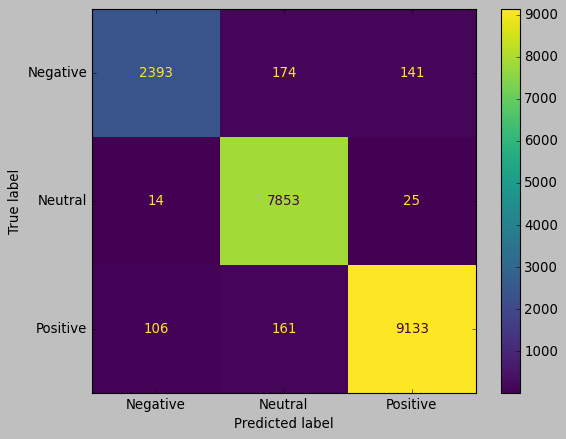

In [11]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

# Naive Bayes

In [12]:
nb = MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None)

nb_model = nb.fit(x_train, y_train)

nb_pred = nb_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, nb_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, nb_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, nb_pred))

Test Accuracy:  75.11%


[[1641   84  983]
 [ 587 4400 2905]
 [ 297  122 8981]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.65      0.61      0.63      2708
     Neutral       0.96      0.56      0.70      7892
    Positive       0.70      0.96      0.81      9400

    accuracy                           0.75     20000
   macro avg       0.77      0.71      0.71     20000
weighted avg       0.79      0.75      0.74     20000



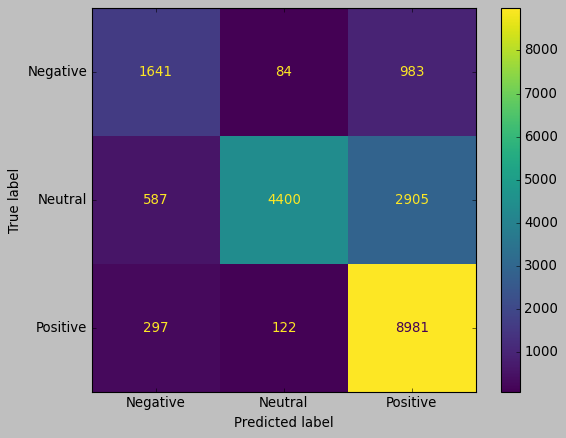

In [13]:
style.use('classic')
cm = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb.classes_)
disp.plot()

# SVM

In [14]:
# Train an SVM classifier on the training set
clf = LinearSVC()
sv_model = clf.fit(x_train, y_train)

# Evaluate the model's performance on the testing set
sv_pred = sv_model.predict(x_test)
print("Test Accuracy:", round(accuracy_score(y_test, sv_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, sv_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, sv_pred))

Test Accuracy: 98.14%


[[2534   64  110]
 [  15 7853   24]
 [  94   65 9241]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.96      0.94      0.95      2708
     Neutral       0.98      1.00      0.99      7892
    Positive       0.99      0.98      0.98      9400

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



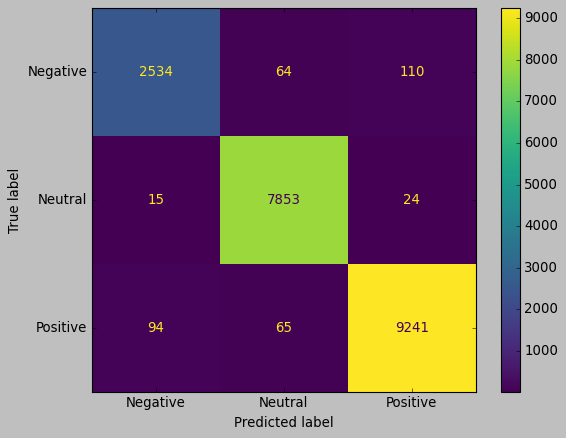

In [15]:
style.use('classic')
cm = confusion_matrix(y_test, sv_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot()

# KNN

In [16]:
kn = KNeighborsClassifier(n_neighbors=3)

kn_model = kn.fit(x_train, y_train)

kn_pred = kn_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, kn_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, kn_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, kn_pred,))

Test Accuracy:  63.63%


[[ 581 1917  210]
 [  61 7442  389]
 [ 123 4574 4703]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.76      0.21      0.33      2708
     Neutral       0.53      0.94      0.68      7892
    Positive       0.89      0.50      0.64      9400

    accuracy                           0.64     20000
   macro avg       0.73      0.55      0.55     20000
weighted avg       0.73      0.64      0.62     20000



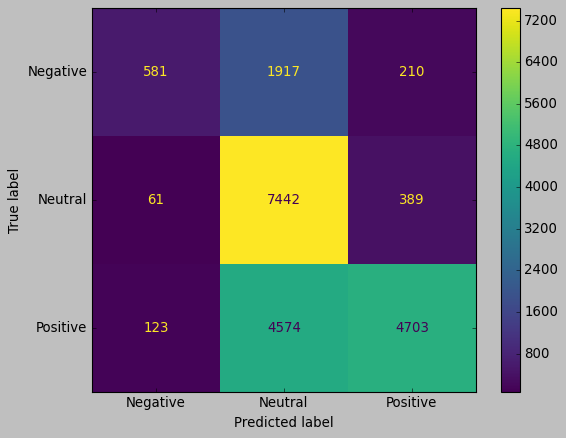

In [17]:
style.use('classic')
cm = confusion_matrix(y_test, kn_pred, labels=kn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=kn.classes_)
disp.plot()

# Decision Tree

In [18]:
dtc = DecisionTreeClassifier(criterion= 'entropy',max_depth = 1000, splitter='best', random_state=100)
dtc_model = dtc.fit(x_train, y_train)

dtc_pred = dtc_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, dtc_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, dtc_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, dtc_pred))

Test Accuracy:  95.98%


[[2323  110  275]
 [  30 7826   36]
 [ 218  134 9048]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      2708
     Neutral       0.97      0.99      0.98      7892
    Positive       0.97      0.96      0.96      9400

    accuracy                           0.96     20000
   macro avg       0.95      0.94      0.94     20000
weighted avg       0.96      0.96      0.96     20000



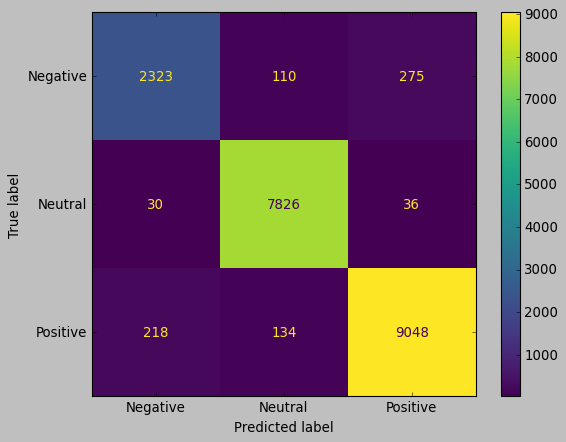

In [19]:
style.use('classic')
cm = confusion_matrix(y_test, dtc_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dtc.classes_)
disp.plot()

# RF

In [20]:
rf = RandomForestClassifier(max_depth = 2000, random_state=42,n_estimators=100,criterion="entropy")

# Train the model on the training set
rf_model = rf.fit(x_train, y_train)

In [21]:
# Make predictions on the test set
rf_pred = rf.predict(x_test)

print("Test accuracy:", round(accuracy_score(y_test, rf_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, rf_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, rf_pred))

Test accuracy: 93.75%


[[2058  343  307]
 [  12 7821   59]
 [  99  430 8871]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.95      0.76      0.84      2708
     Neutral       0.91      0.99      0.95      7892
    Positive       0.96      0.94      0.95      9400

    accuracy                           0.94     20000
   macro avg       0.94      0.90      0.91     20000
weighted avg       0.94      0.94      0.94     20000



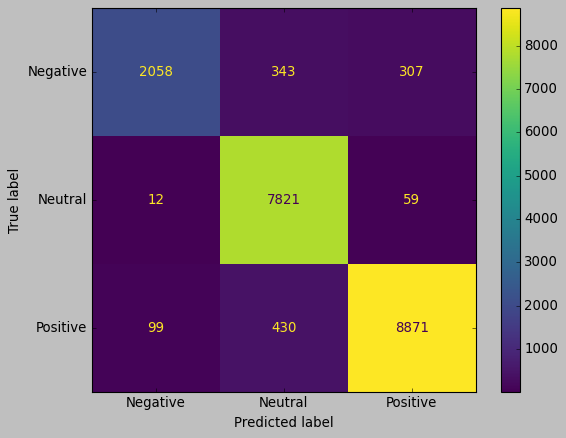

In [22]:
style.use('classic')
cm = confusion_matrix(y_test, rf_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
disp.plot()

#  Store the model names and their accuracy in a dataframe

In [23]:
res = []
res = pd.DataFrame(res)
res["models"] = ["Logistic Regression", "Naive Bayes","SVM",  "KNN", "Decision Tree", "Random Forest"]
res["accuracy"] = [ round(accuracy_score(y_test, logreg_pred)*100,2),round(accuracy_score(y_test, nb_pred)*100,2),round(accuracy_score(y_test, sv_pred)*100,2), round(accuracy_score(y_test, kn_pred)*100,2), round(accuracy_score(y_test, dtc_pred)*100,2), round(accuracy_score(y_test, rf_pred)*100,2)]
res = res.sort_values("accuracy", ascending=False).reset_index(drop=True)
res.to_csv('model_results_100k.csv', index=False)
res

,models,accuracy
0,SVM,98.14
1,Logistic Regression,96.90
2,Decision Tree,95.98
3,Random Forest,93.75
4,Naive Bayes,75.11
5,KNN,63.63


#  Save the traied models locally

In [24]:
import joblib

joblib.dump(logreg_model, 'Trained Models_100k/logregr_model.pkl')
joblib.dump(nb_model, 'Trained Models_100k/nb_model.pkl')
joblib.dump(sv_model, 'Trained Models_100k/svm_model.pkl')
joblib.dump(kn_model, 'Trained Models_100k/kn_model.pkl')
joblib.dump(dtc_model, 'Trained Models_100k/dtc_model.pkl')
joblib.dump(rf_model, 'Trained Models_100k/rf_model.pkl')

['Trained Models_100k/rf_model.pkl']